In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\dd\\Desktop\\IPBA-IIM Indore\\Capstone Project\\Dataset\\MasterFile_Updated.csv")
df.head()

,Unnamed: 0,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,SECTOR
0,0,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1/1/2018 0:00,1527,Mining
1,1,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,1/2/2018 0:00,994,Mining
2,2,20MICRONS,58.70,60.50,58.50,59.20,191320,11345473.80,1/3/2018 0:00,1004,Mining
3,3,20MICRONS,59.45,63.20,58.60,62.60,812025,50057113.35,1/4/2018 0:00,5189,Mining
4,4,20MICRONS,64.80,67.00,63.00,63.60,1129498,73646779.85,1/5/2018 0:00,7645,Mining


In [4]:
print ("Enter SECTOR of interest: ")
sector=input()
if sector not in df.values:
    print("No such SECTOR")
else:
    f1=(df['SECTOR']==sector)
    df2=df[f1]
df2.head(2)

Enter SECTOR of interest: 
Auto


,Unnamed: 0,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,SECTOR
21991,21991,ASHOKLEY,119.65,122.50,118.05,118.65,10218058,1.231995e+09,1/1/2018 0:00,43098,Auto
21992,21992,ASHOKLEY,119.25,123.85,117.00,123.35,27656711,3.362837e+09,1/2/2018 0:00,91859,Auto


In [5]:
df2['TIMESTAMP'] = df2['TIMESTAMP'].apply(pd.to_datetime)
df2.set_index('TIMESTAMP',inplace=True)
df2.head()

C:\Users\dd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,,
2018-01-01,21991,ASHOKLEY,119.65,122.50,118.05,118.65,10218058,1.231995e+09,43098,Auto
2018-01-02,21992,ASHOKLEY,119.25,123.85,117.00,123.35,27656711,3.362837e+09,91859,Auto
2018-01-03,21993,ASHOKLEY,124.75,125.80,123.75,124.50,22686568,2.830879e+09,68757,Auto
2018-01-04,21994,ASHOKLEY,125.25,127.35,123.80,126.95,17032019,2.142969e+09,50307,Auto
2018-01-05,21995,ASHOKLEY,127.00,128.20,126.00,127.45,8969607,1.139880e+09,38238,Auto


In [6]:
stocks_in_sector=df2['SYMBOL'].unique()
stocks_in_sector

array(['ASHOKLEY', 'ATULAUTO', 'BAJAJ-AUTO', 'EICHERMOT', 'ENDURANCE',
       'ESCORTS', 'GNA', 'HEROMOTOCO', 'HINDMOTORS', 'LML', 'M&M',
       'MAHSCOOTER', 'MARUTI', 'PRECAM', 'PRICOLLTD', 'RML', 'SETCO',
       'SHARDAMOTR', 'SMLISUZU', 'TATAMOTORS', 'TATAMTRDVR', 'TIINDIA',
       'TVSMOTOR'], dtype=object)

In [7]:
print ("Enter Stock SYMBOL: ")
stock=input()
if stock not in df2.values:
    print("No such STOCK")
else:
    f2=(df2['SYMBOL']==stock)
    df3=df2[f2]
df3.head(2)

Enter Stock SYMBOL: 
MARUTI


,Unnamed: 0,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,,
2018-01-01,178242,MARUTI,9749.0,9789.0,9629.8,9651.90,426354,4.139291e+09,37440,Auto
2018-01-02,178243,MARUTI,9699.0,9718.6,9525.0,9554.05,451227,4.329811e+09,61125,Auto


In [8]:
from pandas.plotting import autocorrelation_plot

In [9]:
close=df3['CLOSE']
close

TIMESTAMP
2018-01-01    9651.90
2018-01-02    9554.05
2018-01-03    9416.60
2018-01-04    9386.25
2018-01-05    9433.85
               ...   
2018-12-21    7536.30
2018-12-24    7529.15
2018-12-26    7569.10
2018-12-27    7499.95
2018-12-28    7505.55
Name: CLOSE, Length: 215, dtype: float64

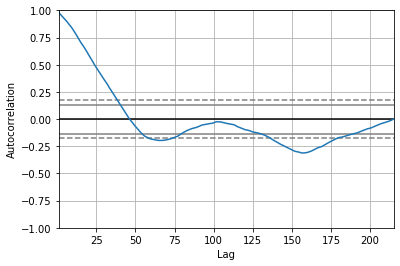

In [11]:
autocorrelation_plot(close)
plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
model=ARIMA(close,order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\dd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.CLOSE   No. Observations:                  214
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1344.443
Method:                       css-mle   S.D. of innovations            129.466
Date:                Thu, 10 Sep 2020   AIC                           2702.887
Time:                        15:58:26   BIC                           2726.449
Sample:                             1   HQIC                          2712.408
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.0404      8.925     -1.125      0.262     -27.533       7.453
ar.L1.D.CLOSE    -0.0058      0.068     -0.084      0.933      -0.140       0.128
ar.L2.D.CLOSE    -0.0449      0.068     

In [15]:
#Plotting residuals

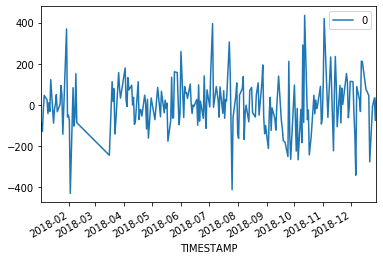

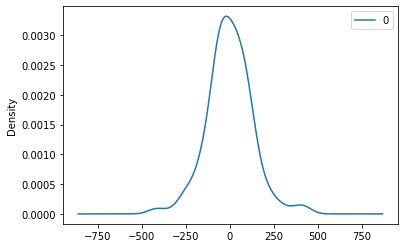

                0
count  214.000000
mean    -0.019378
std    129.774830
min   -428.966743
25%    -70.886405
50%     -3.322801
75%     79.647856
max    435.202290


In [17]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [18]:
#Rolling forecast ARIMA

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
X = close.values

In [21]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [22]:
history = [x for x in train]
predictions = list()

In [23]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=8953.786937, expected=8868.500000
predicted=8885.440864, expected=8896.100000
predicted=8863.007168, expected=8759.850000
predicted=8727.632136, expected=8719.200000
predicted=8702.460722, expected=8639.400000
predicted=8629.685443, expected=8517.050000
predicted=8526.975880, expected=8493.950000
predicted=8476.626334, expected=8626.700000
predicted=8609.934001, expected=8537.800000
predicted=8490.419791, expected=8399.150000
predicted=8391.586247, expected=8210.350000
predicted=8220.787592, expected=8040.150000
predicted=8078.946864, expected=7793.050000
predicted=7763.145007, expected=7999.450000
predicted=8000.562601, expected=7842.550000
predicted=7751.512051, expected=7553.050000
predicted=7535.345876, expected=7347.950000
predicted=7318.847920, expected=7463.950000
predicted=7502.960853, expected=7246.000000
predicted=7146.251028, expected=7198.750000
predicted=7155.968955, expected=6904.350000
predicted=6852.657198, expected=6889.750000
predicted=6904.947465, expected=

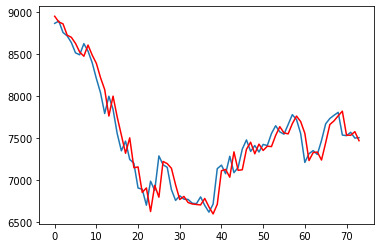

In [24]:
plt.figure(figsize=[10,6])
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [25]:
#Gridsearch for best Hyperparamters(p,d,q)

In [26]:
def evaluate_arima_model(X, arima_order):
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    return error   
          

In [27]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    mse=evaluate_arima_model(dataset,order)
                    if mse<best_score:
                        best_score,best_cfg= mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))                

In [29]:
p_values=[0,1,2,3]
d_values=range(0,2)
q_values=range(0,3)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
evaluate_models(close.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1999267.631
ARIMA(0, 0, 1) MSE=631600.732
ARIMA(0, 1, 0) MSE=23573.641
ARIMA(0, 1, 1) MSE=23802.154
ARIMA(0, 1, 2) MSE=24819.893
ARIMA(0, 2, 0) MSE=47267.691
ARIMA(0, 2, 1) MSE=24652.843
ARIMA(1, 0, 0) MSE=25203.234
ARIMA(1, 1, 0) MSE=23759.692
ARIMA(1, 2, 0) MSE=34085.759
ARIMA(2, 0, 0) MSE=25508.405
ARIMA(2, 1, 0) MSE=24813.197
ARIMA(2, 1, 1) MSE=25038.021
ARIMA(2, 2, 0) MSE=33798.275
ARIMA(2, 2, 1) MSE=26255.613
ARIMA(2, 2, 2) MSE=27219.793
ARIMA(4, 0, 0) MSE=26547.722
ARIMA(4, 1, 0) MSE=25026.883
ARIMA(4, 1, 1) MSE=25054.142
ARIMA(4, 2, 0) MSE=31213.611
ARIMA(4, 2, 1) MSE=26883.338
ARIMA(6, 0, 0) MSE=28044.387
ARIMA(6, 1, 0) MSE=25778.303
ARIMA(6, 1, 1) MSE=26142.777
ARIMA(6, 1, 2) MSE=26539.894
ARIMA(6, 2, 0) MSE=28387.394
ARIMA(6, 2, 1) MSE=26199.503
ARIMA(8, 0, 0) MSE=27897.973
ARIMA(8, 1, 0) MSE=26076.335
ARIMA(8, 1, 1) MSE=26379.490
ARIMA(8, 2, 0) MSE=27704.463
ARIMA(8, 2, 1) MSE=26633.994
ARIMA(8, 2, 2) MSE=27094.822
ARIMA(10, 0, 0) MSE=28309.007
ARIMA(10, 